# M7a: Artificial Neural Networks

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import scale

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import backend as K


2025-10-20 13:33:57.179075: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-20 13:33:57.198219: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-20 13:33:57.203953: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-20 13:33:57.218469: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-20 13:33:58.202522: W tensorflow/comp

ModuleNotFoundError: No module named 'tensorflow.keras.layers.experimental'

In [9]:
def reset_weights(model):
	"""This function re-initializes model weights at each compile"""
	for layer in model.layers: 
		if isinstance(layer, tf.keras.Model):
			reset_weights(layer)
			continue
	for k, initializer in layer.__dict__.items():
		if "initializer" not in k:
			continue
		# find the corresponding variable
		var = getattr(layer, k.replace("_initializer", ""))
		var.assign(initializer(var.shape, var.dtype))

In [3]:
X, y = datasets.fetch_california_housing(return_X_y=True)#, as_frame=True)
X = scale(X)

In [14]:
X, y = datasets.fetch_california_housing(return_X_y=True, as_frame=True)

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <a list of 10 Patch objects>)

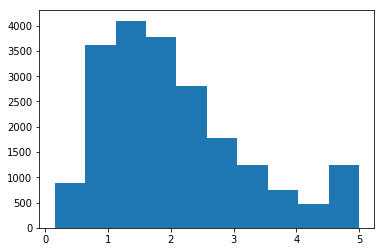

In [4]:
plt.hist(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)
#y_train = y_train/y_train.max()
#y_test = y_test/y_test.max()

In [15]:
len(X_train)

16512

In [16]:
len(X_test)

4128

### Neural network implementation

In [17]:
X.shape[1]

8

In [37]:
K.clear_session()
model = keras.Sequential([
    Input(shape = (X.shape[1],)),
    layers.Dense(units = 16, activation='relu'), #1st hidden layer
    layers.Dense(units = 64, activation='relu'), #2nd hidden layer
    layers.Dense(units = 32, activation='relu'), #3rd hidden layer
    layers.Dense(units = 1) #output layer, activation = None by default
])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,345
Trainable params: 3,345
Non-trainable params: 0
_________________________________________________________________


In [39]:
reset_weights(model)
model.compile(loss='mean_squared_error', optimizer = keras.optimizers.SGD(0.001))

In [40]:
hist = model.fit(X_train, y_train, batch_size = 64,
                 validation_split = 0.25, 
                 #validation_data = (X_test, y_test), 
                 verbose = 1, epochs = 30)

Train on 12384 samples, validate on 4128 samples
Epoch 1/30
12384/12384 [==============================] - 1s 115us/sample - loss: 3.1281 - val_loss: 1.4491
Epoch 2/30
12384/12384 [==============================] - 1s 65us/sample - loss: 1.0504 - val_loss: 0.9219
Epoch 3/30
12384/12384 [==============================] - 1s 66us/sample - loss: 0.8154 - val_loss: 0.7604
Epoch 4/30
12384/12384 [==============================] - 1s 71us/sample - loss: 0.7415 - val_loss: 0.7008
Epoch 5/30
12384/12384 [==============================] - 1s 77us/sample - loss: 0.7090 - val_loss: 0.6742
Epoch 6/30
12384/12384 [==============================] - 1s 67us/sample - loss: 0.6887 - val_loss: 0.6569
Epoch 7/30
12384/12384 [==============================] - 1s 62us/sample - loss: 0.6720 - val_loss: 0.6419
Epoch 8/30
12384/12384 [==============================] - 1s 73us/sample - loss: 0.6572 - val_loss: 0.6291
Epoch 9/30
12384/12384 [==============================] - 1s 77us/sample - loss: 0.6430 - val_

In [24]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

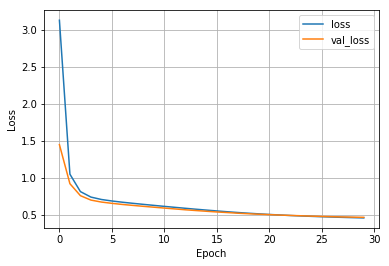

In [41]:
plot_loss(hist)

In [34]:
y_pred = model.predict(X_test).flatten()

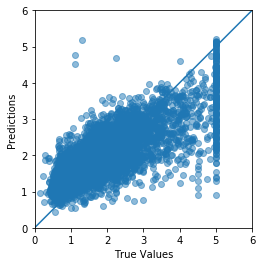

In [27]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, alpha = .5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


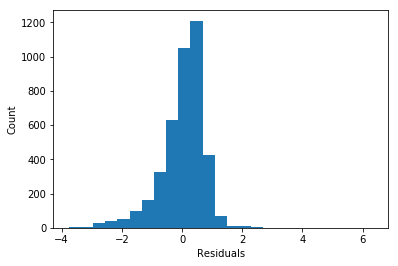

In [35]:
error = y_pred - y_test
plt.hist(error, bins=25)
plt.xlabel('Residuals')
_ = plt.ylabel('Count')

In [36]:
np.mean(error)

0.02760932522398559